In [1]:
# inspection of the run on the server that supports base starcoder

In [2]:
import os
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm

In [3]:
# DIR_PROGRAMS = "../Results/qiskit/run_metamorphic_v2/run_metamorphic/"
DIR_PROGRAMS = "../Results/qiskit/qiskit_full_run_3/run_opt_and_qasm_3/"
# DIR_PROGRAMS = "../Results/qiskit/qiskit_full_run_2/run_opt_and_qasm_2/"
# DIR_PROGRAMS = "../Results/qiskit/qiskit_full_run_1/run_opt_and_qasm/"
#TARGET_API = ".qasm("

programs = os.listdir(DIR_PROGRAMS)
# read all programs in the folder ending with .fuzz
programs = [program for program in programs if program.endswith(".fuzz")]
print(f"Found {len(programs)} programs.")

# read all the programs
path_programs = [
    os.path.join(DIR_PROGRAMS, program) for program in programs
]

# check how many use the API
all_records = []
for path_program in path_programs:
    with open(path_program, "r") as f:
        program = f.read()
    has_oracle_code = "# ==================== ORACLE ====================" in program
    all_records.append({
        "program": os.path.basename(path_program),
        "path_program": path_program,
        "use_oracle": has_oracle_code,
        "pass_parser": has_oracle_code,
        #"use_api": TARGET_API in program
    })


Found 36900 programs.


Percentage of programs passing the parser (validity): 80.49%
pass_parser
True     29701
False     7199
Name: count, dtype: int64


Text(0.5, 1.0, 'Programs Executed (passing the parser)')

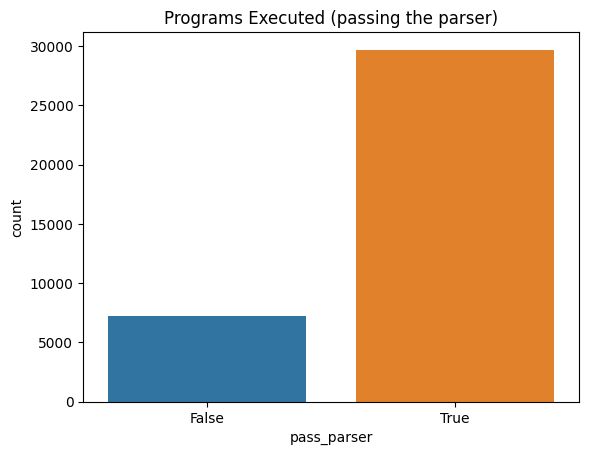

In [4]:
df = pd.DataFrame.from_records(all_records)
perc_pass_parser = df["pass_parser"].sum() / len(df) * 100
print(f"Percentage of programs passing the parser (validity): {perc_pass_parser:.2f}%")
print(df["pass_parser"].value_counts())
sns.countplot(x="pass_parser", data=df)
plt.title("Programs Executed (passing the parser)")


In [5]:

LOG_VALIDATION = os.path.join(DIR_PROGRAMS, "log_validation.txt")
with open(LOG_VALIDATION, "r") as f:
    log_validation = f.read()
    f.close()
    
# [VERBOSE] --------------------------
# [VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/full_run/qiskit/run_opt_and_qasm/35125.
# fuzz:/35125.fuzz qiskit-driver python 35125.fuzz', returncode=0, stdout='', stderr='')                                                                     [TRACE] Validating /home/steven/fastd/fuzzall/FuzzAll/experiment/full_run/qiskit/run_opt_and_qasm/35125.fuzz ...
# [VERBOSE] /home/steven/fastd/fuzzall/FuzzAll/experiment/full_run/qiskit/run_opt_and_qasm/35125.fuzz is safe
# [VERBOSE] --------------------------
# [VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/full_run/qiskit/run_opt_and_qasm/35126.
# fuzz:/35126.fuzz qiskit-driver python 35126.fuzz', returncode=1, stdout='', stderr='Traceback (most recent call last):\n  File "//35126.fuzz", line 3, in <module>\n    q = QuantumRegister(3, \'q\')\nNameError: name \'QuantumRegister\' is not defined\n')                                                         [TRACE] Validating /home/steven/fastd/fuzzall/FuzzAll/experiment/full_run/qiskit/run_opt_and_qasm/35126.fuzz ...
# [VERBOSE] /home/steven/fastd/fuzzall/FuzzAll/experiment/full_run/qiskit/run_opt_and_qasm/35126.fuzz failed validation with error message: Traceback (most r
# ecent call last):                                                                                                                                            File "//35126.fuzz", line 3, in <module>
#     q = QuantumRegister(3, 'q')
# NameError: name 'QuantumRegister' is not defined

# [VERBOSE] --------------------------
# [VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/full_run/qiskit/run_opt_and_qasm/35127.
# fuzz:/35127.fuzz qiskit-driver python 35127.fuzz', returncode=1, stdout='', stderr='Traceback (most recent call last):\n  File "//35127.fuzz", line 17, in <module>\n    qobj = QuantumInstance(Aer.get_backend(\'qasm_simulator\'))\nNameError: name \'QuantumInstance\' is not defined\n')                          [TRACE] Validating /home/steven/fastd/fuzzall/FuzzAll/experiment/full_run/qiskit/run_opt_and_qasm/35127.fuzz ...
# [VERBOSE] /home/steven/fastd/fuzzall/FuzzAll/experiment/full_run/qiskit/run_opt_and_qasm/35127.fuzz failed validation with error message: Traceback (most r
# ecent call last):                                                                                                                                            File "//35127.fuzz", line 17, in <module>
#     qobj = QuantumInstance(Aer.get_backend('qasm_simulator'))
# NameError: name 'QuantumInstance' is not defined

# [VERBOSE] --------------------------
# [VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/full_run/qiskit/run_opt_and_qasm/35128.
# fuzz:/35128.fuzz qiskit-driver python 35128.fuzz', returncode=1, stdout='', stderr='Traceback (most recent call last):\n  File "//35128.fuzz", line 12, in <module>\n    from qiskit.tools.jupyter import *\n  File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/tools/jupyter/__init__.py", line 102, in <module>\n    from IPython import get_ipython\nModuleNotFoundError: No module named \'IPython\'\n')                                            [TRACE] Validating /home/steven/fastd/fuzzall/FuzzAll/experiment/full_run/qiskit/run_opt_and_qasm/35128.fuzz ...
# [VERBOSE] /home/steven/fastd/fuzzall/FuzzAll/experiment/full_run/qiskit/run_opt_and_qasm/35128.fuzz failed validation with error message: Traceback (most r
# ecent call last):                                                                                                                                            File "//35128.fuzz", line 12, in <module>
#     from qiskit.tools.jupyter import *
#   File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/tools/jupyter/__init__.py", line 102, in <module>
#     from IPython import get_ipython
# ModuleNotFoundError: No module named 'IPython'

# [VERBOSE] --------------------------
# [VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/full_run/qiskit/run_opt_and_qasm/35129.
# fuzz:/35129.fuzz qiskit-driver python 35129.fuzz', returncode=1, stdout='', stderr='Traceback (most recent call last):\n  File "//35129.fuzz", line 11, in <module>\n    qc.draw(\'mpl\')\n  File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py", line 1922, in draw\n    return circuit_drawer(\n  File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/visualization/circuit/circuit_visualization.py", line 274, in circuit_drawer\n    image = _matplotlib_circuit_drawer(\n  File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/visualization/circuit/circuit_visualization.py", line 644, in _matplotlib_circuit_drawer\n    qcd = _matplotlib.MatplotlibDrawer(\n  File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/utils/classtools.py", line 111, in out\n    callback.__get__(obj, objtype)(*args, **kwargs)\n  File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/utils/lazy_tester.py", line 39, in __call__\n    self._tester.require_now(self._feature)\n  File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/utils/lazy_tester.py", line 223, in require_now\n    raise MissingOptionalLibraryError(\nqiskit.exceptions.MissingOptionalLibraryError: "The \'matplotlib\' library is required to use \'MatplotlibDrawer\'. You can install it with \'pip install matplotlib\'."\n')                                                                                                                                         [TRACE] Validating /home/steven/fastd/fuzzall/FuzzAll/experiment/full_run/qiskit/run_opt_and_qasm/35129.fuzz ...
# [VERBOSE] /home/steven/fastd/fuzzall/FuzzAll/experiment/full_run/qiskit/run_opt_and_qasm/35129.fuzz failed validation with error message: Traceback (most r
# ecent call last):                                                                                                                                            File "//35129.fuzz", line 11, in <module>
#     qc.draw('mpl')
#   File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py", line 1922, in draw
#     return circuit_drawer(
#   File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/visualization/circuit/circuit_visualization.py", line 274, in circuit_drawer
#     image = _matplotlib_circuit_drawer(
#   File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/visualization/circuit/circuit_visualization.py", line 644, in _matplotlib_circu
# it_drawer                                                                                                                                                      qcd = _matplotlib.MatplotlibDrawer(
#   File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/utils/classtools.py", line 111, in out
#     callback.__get__(obj, objtype)(*args, **kwargs)
#   File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/utils/lazy_tester.py", line 39, in __call__
#     self._tester.require_now(self._feature)
#   File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/utils/lazy_tester.py", line 223, in require_now
#     raise MissingOptionalLibraryError(
# qiskit.exceptions.MissingOptionalLibraryError: "The 'matplotlib' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install matplo
# tlib'."                                                                                                                                                    

separator = "[VERBOSE] --------------------------"
logs = log_validation.split(separator)

all_records_log = []
for log in tqdm(logs):
    # extract the program name from the log
    # /233.fuzz -> 233
    program_name = re.findall(r"\/(\d+).fuzz", log)
    program_name = program_name[0] if len(program_name) > 0 else None
    
    # extract if the program was executed or not based on CompletedProcess(args string
    has_executed_program = "CompletedProcess(args" in log

    # classify category of error
    # 1. safe
    # 2. error
    # 3. failed validation  

    if "is safe" in log:
        category = "safe"
    elif "failed validation" in log:
        category = "failure"
    elif "potential error" in log:
        category = "error"
    else:
        category = "unknown"

    # parse stdout and stderr
    # extract the error message

    stderr = re.findall(r"stderr='(.*)'", log)
    stderr = stderr[0] if len(stderr) > 0 else None
    stdout = re.findall(r"stdout='([^stderr]*)'", log)
    stdout = stdout[0] if len(stdout) > 0 else None

    # create sub-categories
    subcategory = None
    if not has_executed_program and category == "failure":
        subcategory = "parsing failure"

    all_records_log.append({
        "program": program_name,
        "has_executed_program": has_executed_program,
        "category": category,
        "subcategory": subcategory,
        "raw_log": log,
        "stderr": stderr,
        "stdout": stdout,
    })

df_logs = pd.DataFrame.from_records(all_records_log)
# drop the first row where program is None
df_logs = df_logs.dropna(subset=["program"])
df_logs.head()

100%|██████████| 36902/36902 [00:00<00:00, 101681.93it/s]


,program,has_executed_program,category,subcategory,raw_log,stderr,stdout
1,0,True,failure,None,\n[VERBOSE] Execution result: CompletedProcess...,"Traceback (most recent call last):\n File ""/o...",
2,1,True,failure,None,\n[VERBOSE] Execution result: CompletedProcess...,"Traceback (most recent call last):\n File ""//...",
3,2,True,failure,None,\n[VERBOSE] Execution result: CompletedProcess...,"Traceback (most recent call last):\n File ""//...",
4,3,True,safe,None,\n[VERBOSE] Execution result: CompletedProcess...,,
5,4,True,failure,None,\n[VERBOSE] Execution result: CompletedProcess...,"Traceback (most recent call last):\n File ""//...",


In [6]:
df_logs["path_program"] = df_logs["program"].apply(lambda x: os.path.join(DIR_PROGRAMS, f"{x}.fuzz"))
df_logs.head()

,program,has_executed_program,category,subcategory,raw_log,stderr,stdout,path_program
1,0,True,failure,None,\n[VERBOSE] Execution result: CompletedProcess...,"Traceback (most recent call last):\n File ""/o...",,../Results/qiskit/qiskit_full_run_3/run_opt_an...
2,1,True,failure,None,\n[VERBOSE] Execution result: CompletedProcess...,"Traceback (most recent call last):\n File ""//...",,../Results/qiskit/qiskit_full_run_3/run_opt_an...
3,2,True,failure,None,\n[VERBOSE] Execution result: CompletedProcess...,"Traceback (most recent call last):\n File ""//...",,../Results/qiskit/qiskit_full_run_3/run_opt_an...
4,3,True,safe,None,\n[VERBOSE] Execution result: CompletedProcess...,,,../Results/qiskit/qiskit_full_run_3/run_opt_an...
5,4,True,failure,None,\n[VERBOSE] Execution result: CompletedProcess...,"Traceback (most recent call last):\n File ""//...",,../Results/qiskit/qiskit_full_run_3/run_opt_an...


<Axes: xlabel='count', ylabel='category'>

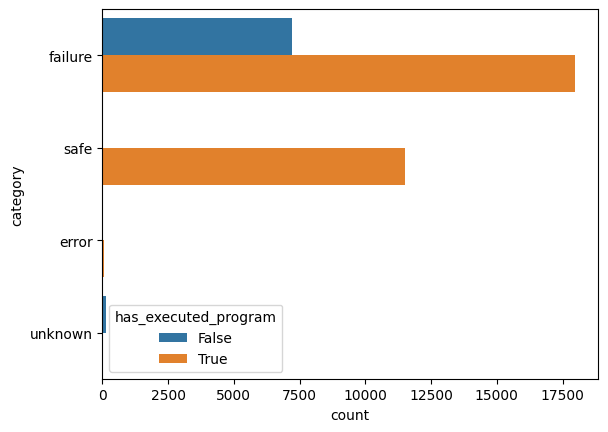

In [7]:
sns.countplot(
    data=df_logs,
    y="category",
    hue="has_executed_program"
)

## Parser Failure: Why?

### Categorize

In [11]:
# try to parse all the unparsable programs and collect the exceptions
import ast

def try_parsing(path_program: str) -> str:
    """Try parsing and return the error or empty string if no error.
    """
    try:
        with open(path_program, "r") as f:
            program = f.read()
        ast.parse(program)
        return ""
    except Exception as e:
        return str(e)
    
df_logs["syntax_error_message"] = df_logs["path_program"].apply(try_parsing)
# invalid syntax (<unknown>, line 12)  -> 12
df_logs["syntax_error_line"] = df_logs["syntax_error_message"].apply(
    lambda x: int(re.findall(r"\(.*line (\d+)\)", x)[0]) if x != "" else -1
)
# get the content based on the path_program and the error_line
def get_content(path_program: str, error_line: int) -> str:
    """Get the content of the line where the error is.
    """
    if error_line == -1:
        return ""
    with open(path_program, "r") as f:
        program = f.read()
    lines = program.split("\n")
    return lines[error_line - 1]

df_logs["syntax_error_line_content"] = df_logs.apply(
    lambda x: get_content(x["path_program"], x["syntax_error_line"]),
    axis=1
)

In [12]:
df_logs.head()

,program,has_executed_program,category,subcategory,raw_log,stderr,stdout,path_program,syntax_error_message,syntax_error_line,syntax_error_line_content
1,0,True,failure,None,\n[VERBOSE] Execution result: CompletedProcess...,"Traceback (most recent call last):\n File ""//...",,../Results/qiskit/qiskit_full_run_1/run_opt_an...,,-1,
2,1,True,failure,None,\n[VERBOSE] Execution result: CompletedProcess...,"Traceback (most recent call last):\n File ""//...",,../Results/qiskit/qiskit_full_run_1/run_opt_an...,,-1,
3,2,True,failure,None,\n[VERBOSE] Execution result: CompletedProcess...,"Traceback (most recent call last):\n File ""//...",,../Results/qiskit/qiskit_full_run_1/run_opt_an...,,-1,
4,3,True,safe,None,\n[VERBOSE] Execution result: CompletedProcess...,,,../Results/qiskit/qiskit_full_run_1/run_opt_an...,,-1,
5,4,True,safe,None,\n[VERBOSE] Execution result: CompletedProcess...,,,../Results/qiskit/qiskit_full_run_1/run_opt_an...,,-1,


In [57]:
# normalize the error_prefix
def get_error_category(syntax_error_message: str, error_line_content: str) -> str:
    """Extract the error category from the error message.
    """
    # categorization based on the error message
    if "parenthes" in syntax_error_message or \
            "never closed" in syntax_error_message or \
            "unmatched" in syntax_error_message:
        return "parenthesis"
    elif "invalid character" in syntax_error_message or \
        "invalid non-printable character" in syntax_error_message:
        return "invalid character"
    elif "indent" in syntax_error_message:
        return "indentation"
    elif "unterminated triple-quoted str" in syntax_error_message or "unterminated string" in syntax_error_message:
        return "unterminated string"
    
    # categorization based on the error line content
    if error_line_content.endswith("import"):
        return "unterminated import"
    elif error_line_content.strip().endswith("="):
        return "incomplete assignment"
    elif error_line_content.strip().startswith("%") or "pip install" in error_line_content:
        return "magic command / pip install"
    elif error_line_content.strip() == "```" or "![" in error_line_content:
        return "markdown"
    elif "<jupyter_output>" in error_line_content:
        return "jupyter output"

    return "other"
    # elif "invalid syntax" in syntax_error_message:
    #     return "generic syntax error"

df_logs["syntax_error_category"] = df_logs.apply(
    lambda x: get_error_category(x["syntax_error_message"], x["syntax_error_line_content"]),
    axis=1
)
for m in df_logs["syntax_error_category"].unique():
    print(f"'{m}': ,")

'other': ,
'unterminated string': ,
'incomplete assignment': ,
'jupyter output': ,
'indentation': ,
'magic command / pip install': ,
'invalid character': ,
'markdown': ,
'parenthesis': ,


### Plot Parser Errors

Text(0, 0.5, 'Syntax Error Category')

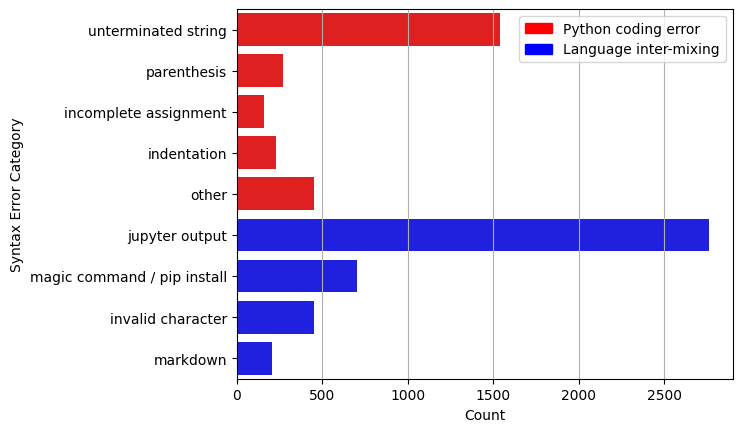

In [64]:
CAT_CODER = "Python coding error"
CAT_CODER_COLOR = "red"
CAT_LANGUAGE = "Language inter-mixing"
CAT_LANGUAGE_COLOR = "blue"

map_category = {
'unterminated string': CAT_CODER,
'parenthesis': CAT_CODER,
'incomplete assignment': CAT_CODER,
'indentation': CAT_CODER,
'other': CAT_CODER,
'jupyter output': CAT_LANGUAGE,
'magic command / pip install': CAT_LANGUAGE,
'invalid character': CAT_LANGUAGE,
'markdown': CAT_LANGUAGE,
}


# get parser error when syntax_error_message is not empty
df_logs_parser_error = df_logs[
    (df_logs["syntax_error_message"] != "") & (~df_logs["has_executed_program"])
]
sns.countplot(
    df_logs_parser_error,
    y="syntax_error_category",
    order=map_category.keys(),
    palette=[
        CAT_CODER_COLOR if map_category[k] == CAT_CODER else CAT_LANGUAGE_COLOR
        for k in map_category.keys()
    ]
)

# add legend with patches and labels
import matplotlib.patches as mpatches

# create a list of legend patches
legend_patches = [
    mpatches.Patch(color=CAT_CODER_COLOR, label=CAT_CODER),
    mpatches.Patch(color=CAT_LANGUAGE_COLOR, label=CAT_LANGUAGE),
]

# add the legend
plt.legend(handles=legend_patches)


plt.grid(axis="x")
plt.xlabel("Count")
plt.ylabel("Syntax Error Category")

In [46]:
# inspect sample of generic syntax errors
df_logs_generic_syntax_error = df_logs_parser_error[
    df_logs_parser_error["syntax_error_category"] == "generic syntax error"]
df_sample = df_logs_generic_syntax_error.sample(10, random_state=42)
for _, row in df_sample.iterrows():
    print("-" * 80)
    print(row["syntax_error_message"])
    print(row["path_program"])
    print(row["syntax_error_line_content"])
    print()


ValueError: a must be greater than 0 unless no samples are taken

In [47]:
# inspect sample of others
df_logs_other = df_logs_parser_error[
    df_logs_parser_error["syntax_error_category"] == "other"]
df_sample = df_logs_other.sample(10, random_state=42)
for _, row in df_sample.iterrows():
    print("-" * 80)
    print(row["stderr"])
    print(row["stdout"])
    print(row["syntax_error_message"])
    print(row["path_program"])
    print(row["has_executed_program"])
    print(row["syntax_error_line_content"])
    print()

--------------------------------------------------------------------------------
None
None
invalid syntax (<unknown>, line 15)
../Results/qiskit/qiskit_full_run_1/run_opt_and_qasm/23712.fuzz
False
from qiskit import QuantumCircuit import ClassicalRegister

--------------------------------------------------------------------------------
None
None
invalid syntax. Perhaps you forgot a comma? (<unknown>, line 4)
../Results/qiskit/qiskit_full_run_1/run_opt_and_qasm/1959.fuzz
False
qc.ry(3.1[...]<jupyter_text>Example 2.5  Variational Quantum Eigensolver (VQE) on a Qiskit simulated Quantum Computer<jupyter_code>import numpy as np

--------------------------------------------------------------------------------
None
None
invalid syntax (<unknown>, line 12)
../Results/qiskit/qiskit_full_run_1/run_opt_and_qasm/27624.fuzz
False
;

--------------------------------------------------------------------------------
None
None
invalid syntax (<unknown>, line 24)
../Results/qiskit/qiskit_full_run_1/run_o

/tmp/ipykernel_37437/1603913038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logs_other["abstract_syntax_error_message"] = df_logs_other["syntax_error_message"].apply(


<Axes: xlabel='count', ylabel='abstract_syntax_error_message'>

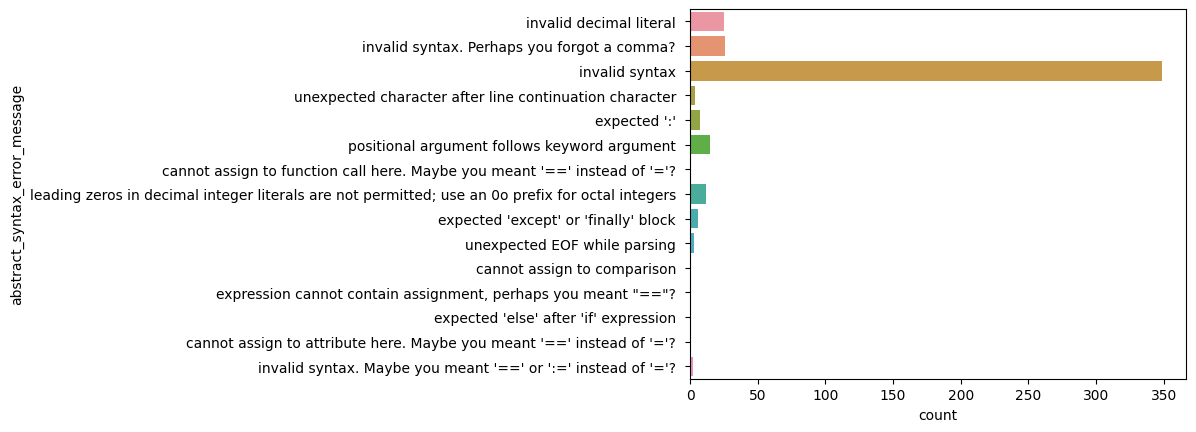

In [48]:
# group messages to remove the last parenthesis
df_logs_other["abstract_syntax_error_message"] = df_logs_other["syntax_error_message"].apply(
    lambda x: x.split("(")[0]
)
sns.countplot(
    df_logs_other,
    y="abstract_syntax_error_message",
)

## Execution failure: why?

In [76]:
# get logs where category==failure and has_executed_program==True
df_logs_exec_failure = df_logs[
    (df_logs["category"] == "failure") & (df_logs["has_executed_program"])
]
# get execution error line:
# Traceback (most recent call last):\n  File "//31178.fuzz", line 37, in <module>\n  -> 37
df_logs_exec_failure["execution_error_line"] = df_logs_exec_failure["stderr"].apply(
    lambda x: int(re.findall(r'fuzz", line (\d+)', x)[0]) if x != "" else -1
)
# get execution error line content
df_logs_exec_failure["execution_error_line_content"] = df_logs_exec_failure.apply(
    lambda x: get_content(x["path_program"], x["execution_error_line"]),
    axis=1
)
# get the exception or error
df_logs_exec_failure["execution_error_exception"] = df_logs_exec_failure["stderr"].apply(
    lambda x: re.findall(r"((Error|Exception).*)$", x)[0][0] if x != "" and re.findall(r"(Error|Exception)(.*)$", x) else ""
)

# sample 10 and see the stderr and stdout
df_sample = df_logs_exec_failure.sample(10, random_state=42)
for _, row in df_sample.iterrows():
    print("-" * 80)
    print(row["stderr"])
    print(row["stdout"])
    print(row["path_program"])
    print(row["has_executed_program"])
    print(row["execution_error_line_content"])
    print(row["execution_error_exception"])
    print()

/tmp/ipykernel_37437/1862073193.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logs_exec_failure["execution_error_line"] = df_logs_exec_failure["stderr"].apply(


--------------------------------------------------------------------------------
Traceback (most recent call last):\n  File "//31178.fuzz", line 37, in <module>\n    b = fake_provider.get_backend(\'fake_p13\')\n  File "//31178.fuzz", line 22, in get_backend\n    return FakeBackend(name)\nTypeError: Can\'t instantiate abstract class FakeBackend with abstract method _default_options\n

../Results/qiskit/qiskit_full_run_1/run_opt_and_qasm/31178.fuzz
True
b = fake_provider.get_backend('fake_p13')
Error: Can\'t instantiate abstract class FakeBackend with abstract method _default_options\n

--------------------------------------------------------------------------------
//3827.fuzz:18: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).\n  I

/tmp/ipykernel_37437/1862073193.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logs_exec_failure["execution_error_line_content"] = df_logs_exec_failure.apply(
/tmp/ipykernel_37437/1862073193.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logs_exec_failure["execution_error_exception"] = df_logs_exec_failure["stderr"].apply(


['variable hallucination', 'qiskit - circuit error', 'missing library (matplotlib)', 'attribute hallucination', 'other', 'import hallucination', 'unsupported operand type', 'argument hallucination', 'qiskit - generic error', 'missing positional argument', 'file hallucination']


/tmp/ipykernel_37437/3457042025.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logs_exec_failure["execution_error_category"] = df_logs_exec_failure.apply(


<Axes: xlabel='count', ylabel='execution_error_category'>

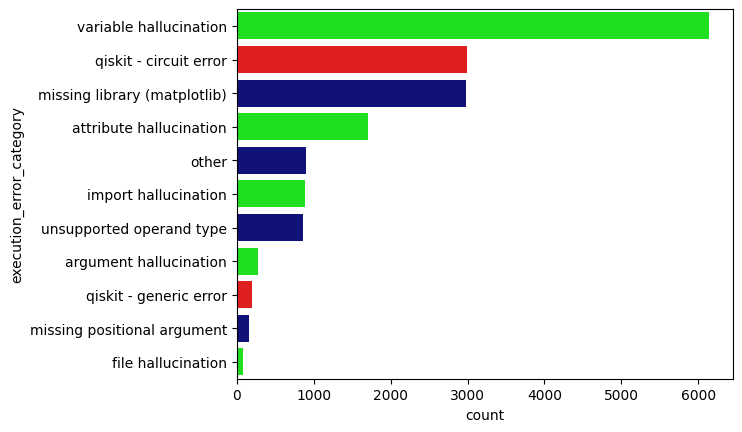

In [105]:
# categorization 
# normalize the error_prefix
def get_exec_error_category(syntax_error_message: str, error_line_content: str, execution_error_exception: str) -> str:
    """Extract the execution error category from the error message.
    """
    if "not defined" in execution_error_exception:
        return "variable hallucination"
    elif "MissingOptionalLibraryError" in execution_error_exception and \
            "matplotlib" in execution_error_exception:
        return "missing library (matplotlib)"
    elif "unsupported operand type" in execution_error_exception:
        return "unsupported operand type" 
    elif " has no attribute " in execution_error_exception:
        return "attribute hallucination"
    elif "required positional argument" in execution_error_exception:
        return "missing positional argument"
    elif "unexpected keyword argument" in execution_error_exception:
        return "argument hallucination"
    elif "cannot import name " in execution_error_exception or \
        "No module named" in execution_error_exception:
        return "import hallucination"
    elif "No such file or directory" in execution_error_exception:
        return "file hallucination"
    elif "CircuitError" in execution_error_exception:
        return "qiskit - circuit error"
    elif "QiskitError" in execution_error_exception:
        return "qiskit - generic error"
    return "other"

df_logs_exec_failure["execution_error_category"] = df_logs_exec_failure.apply(
    lambda x: get_exec_error_category(x["syntax_error_message"], x["syntax_error_line_content"], x["execution_error_exception"]),
    axis=1
)

order = list(df_logs_exec_failure["execution_error_category"].value_counts().index)
print(order)

def get_color_based_on_name(name:str) -> str:
    """Get the color based on the name.
    """
    if "hallucination" in name:
        return "lime"
    elif "qiskit" in name:
        return "red"
    return "darkblue"


sns.countplot(
    df_logs_exec_failure,
    y="execution_error_category",
    # create a paltette where the names with hallucination are in red, the others in green
    # those with qiskit in gold
    palette=[
        get_color_based_on_name(name)
        for name in order
    ],
    order=order
)



In [97]:
# inspect a sample of the others
df_logs_exec_failure_other = df_logs_exec_failure[
    df_logs_exec_failure["execution_error_category"] == "other"]
df_sample = df_logs_exec_failure_other.sample(10, random_state=42)
for _, row in df_sample.iterrows():
    print("-" * 80)
    print(row["stderr"])
    print(row["stdout"])
    print(row["path_program"])
    print(row["has_executed_program"])
    print(row["execution_error_line_content"])
    print(row["execution_error_exception"])
    print()

--------------------------------------------------------------------------------
Traceback (most recent call last):\n  File "//2378.fuzz", line 4, in <module>\n    circuit.append(QuantumCircuit.from_qasm_str(\'reset q[0]; x q[0];\').to_instruction(),[1])\n  File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py", line 2529, in from_qasm_str\n    return _circuit_from_qasm(qasm)\n  File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py", line 4964, in _circuit_from_qasm\n    ast = qasm.parse()\n  File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/qasm/qasm.py", line 53, in parse\n    return qasm_p.parse(self._data)\n  File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/qasm/qasmparser.py", line 1137, in parse\n    self.parser.parse(data, lexer=self.lexer, debug=self.parse_deb)\n  File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/ply/yacc.

## Inspect potential Bugs

In [8]:
# print all the logs of the errors (and the program name)
df_intresting_cases = df_logs[df_logs["category"] == "error"]
print(f"Found {len(df_intresting_cases)} intresting cases.")

for _, row in df_intresting_cases.iterrows():
    print("-" * 80)
    local_link = os.path.join(DIR_PROGRAMS, row["program"] + ".fuzz")
    # get the absolute path of the program
    abs_path_program = os.path.abspath(local_link)
    print(f"Program: {row['program']}")

    content = open(abs_path_program, "r").read()
    # remove all empty lines
    all_lines = content.splitlines()
    non_empty_lines = [
        line for line in all_lines
        if line.strip() != "" ]
    content = "\n".join(non_empty_lines)
    print(content)
    error = row["stderr"]
    # make sure to print the \n as new line
    error = error.replace("\\n", "\n")
    print("Error: ", error)

    print(row["raw_log"])
    print("\n")



Found 79 intresting cases.
--------------------------------------------------------------------------------
Program: 142
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
qc = QuantumCircuit(2,2)
param = Parameter('θ')
qc.h(0)
qc.cx(0,1)
qc.rz(param,0)
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.draw()
# ==================== ORACLE ====================
from qiskit.compiler import transpile
from qiskit import QuantumCircuit
class CustomFuzzAllException(Exception):
    pass
# get any the global variables (including the circuits)
global_vars = list(globals().keys())
# keep all those that are QuantumCircuit
circuits = [
    globals()[var] for var in global_vars
    if isinstance(globals()[var], QuantumCircuit)
]
try:
    # transpile them
    for circuit in circuits:
        for lvl in range(0, 4):
            res = transpile(circuit, optimization_level=lvl)
            # print(f"Optimization level {lvl} for circuit {circuit.name}")
            # print(res.draw())
    # conert t

## Old Categorization

In [30]:
LOG_VALIDATION = os.path.join(DIR_PROGRAMS, "log_validation.txt")
with open(LOG_VALIDATION, "r") as f:
    log_validation = f.read()
    f.close()
# parse the log:
# [TRACE] Validating /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/78.fuzz ...
# [VERBOSE] /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/78.fuzz is safe
# [VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/79.fuzz:/79.fuzz qiskit-driver 79.fuzz', returncode=0, stdout='', stderr='')

# gets:
# level, log
# level: TRACE, VERBOSE, INFO
# log: what is after the level

# get all the logs and their levels
logs = re.findall(r"\[(TRACE|VERBOSE|INFO)\] (.*)", log_validation)
df_logs = pd.DataFrame.from_records(logs, columns=["level", "log"])
df_logs.head()

# group each three lines with VERBOSE, TRACE, VERBOSE into one record
new_records = []
i = 2
while i < len(df_logs):
    # get current line and the two previous
    current_line = df_logs.iloc[i]
    prev_line = df_logs.iloc[i - 1]
    prev_prev_line = df_logs.iloc[i - 2]
    combination = [prev_prev_line["level"], prev_line["level"], current_line["level"]]
    # print(combination)
    # print(prev_prev_line["log"])
    # print(prev_line["log"])
    # print(current_line["log"])
    # [VERBOSE, TRACE, VERBOSE]
    if combination == ["VERBOSE", "TRACE", "VERBOSE"]:
        new_records.append({
            "level": "EXECUTED",
            "log": prev_prev_line["log"] + "\n" + prev_line["log"] + "\n" + current_line["log"]
        })
        i += 3
    elif combination == ["TRACE", "TRACE", "TRACE"]:
        new_records.append({
            "level": "FAILED PARSING",
            "log": prev_prev_line["log"]
        })
        new_records.append({
            "level": "FAILED PARSING",
            "log": prev_line["log"]
        })
        i += 2
    elif combination == ["TRACE", "TRACE", "VERBOSE"]:
        if "timed out" in current_line["log"]:
            new_records.append({
                "level": "FAILED PARSING",
                "log": prev_prev_line["log"]
            })
            new_records.append({
                "level": "TIMEOUT",
                "log": prev_line["log"] + "\n" + current_line["log"]
            })
            i += 3
        else:
            new_records.append({
                "level": "FAILED PARSING",
                "log": prev_prev_line["log"]
            })
            new_records.append({
                "level": "FAILED PARSING",
                "log": prev_line["log"]
            })
            i += 2
    elif combination == ["TRACE", "VERBOSE", "TRACE"]:
        new_records.append({
            "level": "FAILED PARSING",
            "log": prev_prev_line["log"]
        })
        i += 1
    
    else:
        print("ERROR")
        print(combination)
        break

df_clean_log = pd.DataFrame.from_records(new_records)
df_clean_log.head()   


,level,log
0,FAILED PARSING,Validating /home/steven/fastd/fuzzall/FuzzAll/...
1,EXECUTED,Execution result: CompletedProcess(args='docke...
2,EXECUTED,Execution result: CompletedProcess(args='docke...
3,EXECUTED,Execution result: CompletedProcess(args='docke...
4,EXECUTED,Execution result: CompletedProcess(args='docke...


In [32]:
# extract program "1232.fuzz" from the log column with regex    
df_clean_log["program"] = df_clean_log["log"].apply(lambda x: re.findall(r"(\d+.fuzz)", x)[0])
df_clean_log.head()

,level,log,program
0,FAILED PARSING,Validating /home/steven/fastd/fuzzall/FuzzAll/...,0.fuzz
1,EXECUTED,Execution result: CompletedProcess(args='docke...,1.fuzz
2,EXECUTED,Execution result: CompletedProcess(args='docke...,2.fuzz
3,EXECUTED,Execution result: CompletedProcess(args='docke...,3.fuzz
4,EXECUTED,Execution result: CompletedProcess(args='docke...,4.fuzz


In [39]:
df_merged = pd.merge(
    left=df,
    right=df_clean_log,
    left_on="program",
    right_on="program",
)
df_merged.head()

,program,path_program,use_oracle,pass_parser,level,log
0,5391.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,False,False,FAILED PARSING,Validating /home/steven/fastd/fuzzall/FuzzAll/...
1,8252.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,True,True,EXECUTED,Execution result: CompletedProcess(args='docke...
2,5760.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,True,True,EXECUTED,Execution result: CompletedProcess(args='docke...
3,330.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,True,True,EXECUTED,Execution result: CompletedProcess(args='docke...
4,2341.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,True,True,EXECUTED,Execution result: CompletedProcess(args='docke...


In [48]:
# try to parse all the unparsable programs and collect the exceptions
import ast

def try_parsing(path_program: str) -> str:
    """Try parsing and return the error or empty string if no error.
    """
    try:
        with open(path_program, "r") as f:
            program = f.read()
        ast.parse(program)
        return ""
    except Exception as e:
        return str(e)
    
df_merged["syntax_error"] = df_merged["path_program"].apply(try_parsing)
# invalid syntax (<unknown>, line 12)  -> 12
df_merged["syntax_error_line"] = df_merged["error"].apply(
    lambda x: int(re.findall(r"\(.*line (\d+)\)", x)[0]) if x != "" else -1
)
# get the content based on the path_program and the error_line
def get_content(path_program: str, error_line: int) -> str:
    """Get the content of the line where the error is.
    """
    if error_line == -1:
        return ""
    with open(path_program, "r") as f:
        program = f.read()
    lines = program.split("\n")
    return lines[error_line - 1]

df_merged["error_line_content"] = df_merged.apply(
    lambda x: get_content(x["path_program"], x["syntax_error_line"]),
    axis=1
)


In [49]:
df_merged

,program,path_program,use_oracle,pass_parser,level,log,error,error_line,error_line_content,err_contains_jupyter_output,syntax_error,syntax_error_line
0,5391.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,False,False,FAILED PARSING,Validating /home/steven/fastd/fuzzall/FuzzAll/...,"invalid syntax (<unknown>, line 12)",12,circuit.draw()<jupyter_output><ipython-input-4...,True,"invalid syntax (<unknown>, line 12)",12
1,8252.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,True,True,EXECUTED,Execution result: CompletedProcess(args='docke...,,-1,,False,,-1
2,5760.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,True,True,EXECUTED,Execution result: CompletedProcess(args='docke...,,-1,,False,,-1
3,330.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,True,True,EXECUTED,Execution result: CompletedProcess(args='docke...,,-1,,False,,-1
4,2341.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,True,True,EXECUTED,Execution result: CompletedProcess(args='docke...,,-1,,False,,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
10015,3334.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,False,False,FAILED PARSING,Validating /home/steven/fastd/fuzzall/FuzzAll/...,"invalid syntax (<unknown>, line 11)",11,print(qasm_circuit)<jupyter_output><empty_outp...,True,"invalid syntax (<unknown>, line 11)",11
10016,3956.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,True,True,EXECUTED,Execution result: CompletedProcess(args='docke...,,-1,,False,,-1
10017,2355.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,False,False,FAILED PARSING,Validating /home/steven/fastd/fuzzall/FuzzAll/...,"invalid syntax (<unknown>, line 16)",16,"print('QASM for Grover Search:', qp.qasm())<ju...",True,"invalid syntax (<unknown>, line 16)",16
10018,1164.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,True,True,EXECUTED,Execution result: CompletedProcess(args='docke...,,-1,,False,,-1


In [50]:
# quantifies how many contains <jupyter_output> in the error line
df_merged["err_contains_jupyter_output"] = df_merged["error_line_content"].apply(
    lambda x: "<jupyter_output>" in x
)
df_merged["err_contains_jupyter_output"].value_counts()

err_contains_jupyter_output
False    9066
True      954
Name: count, dtype: int64

In [56]:
df_merged["error_prefix"] = df_merged["error"].apply(
    lambda x: x[:30] if len(x) > 30 else x)

In [75]:
# keep all the remaining errors with error_line_content not containing <jupyter_output>
df_remaining_errors = df_merged[
    ~(df_merged["err_contains_jupyter_output"]) & 
    (df_merged["syntax_error"] != "")]

# keep those with "invalid syntax" in the "syntax_error"
df_remaining_errors = df_remaining_errors[
    df_remaining_errors["syntax_error"].str.contains("invalid syntax")]

# sample 10
df_remaining_errors.sample(10)
df_remaining_errors.head(10)

,program,path_program,use_oracle,pass_parser,level,log,error,error_line,error_line_content,err_contains_jupyter_output,syntax_error,syntax_error_line,error_prefix,err_contains_about_parenthesis,err_contains_about_char,err_contains_about_indent,error_category
13,3285.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,False,False,FAILED PARSING,Validating /home/steven/fastd/fuzzall/FuzzAll/...,"invalid syntax (<unknown>, line 9)",9,qasm_circuit =,False,"invalid syntax (<unknown>, line 9)",9,"invalid syntax (<unknown>, lin",False,False,False,generic syntax error
47,4510.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,False,False,FAILED PARSING,Validating /home/steven/fastd/fuzzall/FuzzAll/...,"invalid syntax (<unknown>, line 7)",7,"qc.set_classical_ Registers(0,1)",False,"invalid syntax (<unknown>, line 7)",7,"invalid syntax (<unknown>, lin",False,False,False,generic syntax error
124,4309.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,False,False,FAILED PARSING,Validating /home/steven/fastd/fuzzall/FuzzAll/...,"invalid syntax (<unknown>, line 29)",29,from qiskit import,False,"invalid syntax (<unknown>, line 29)",29,"invalid syntax (<unknown>, lin",False,False,False,generic syntax error
183,9726.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,False,False,FAILED PARSING,Validating /home/steven/fastd/fuzzall/FuzzAll/...,"invalid syntax (<unknown>, line 18)",18,%qiskit_version_table,False,"invalid syntax (<unknown>, line 18)",18,"invalid syntax (<unknown>, lin",False,False,False,generic syntax error
222,7978.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,False,False,FAILED PARSING,Validating /home/steven/fastd/fuzzall/FuzzAll/...,"invalid syntax (<unknown>, line 24)",24,%matplotlib inline,False,"invalid syntax (<unknown>, line 24)",24,"invalid syntax (<unknown>, lin",False,False,False,generic syntax error
243,3764.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,False,False,FAILED PARSING,Validating /home/steven/fastd/fuzzall/FuzzAll/...,"invalid syntax (<unknown>, line 32)",32,%%bash,False,"invalid syntax (<unknown>, line 32)",32,"invalid syntax (<unknown>, lin",False,False,False,generic syntax error
261,7977.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,False,False,FAILED PARSING,Validating /home/steven/fastd/fuzzall/FuzzAll/...,"invalid syntax (<unknown>, line 91)",91,%matplotlib inline,False,"invalid syntax (<unknown>, line 91)",91,"invalid syntax (<unknown>, lin",False,False,False,generic syntax error
274,3752.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,False,False,FAILED PARSING,Validating /home/steven/fastd/fuzzall/FuzzAll/...,"invalid syntax (<unknown>, line 14)",14,X q_0,False,"invalid syntax (<unknown>, line 14)",14,"invalid syntax (<unknown>, lin",False,False,False,generic syntax error
278,5017.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,False,False,FAILED PARSING,Validating /home/steven/fastd/fuzzall/FuzzAll/...,"invalid syntax (<unknown>, line 15)",15,qasm_str =,False,"invalid syntax (<unknown>, line 15)",15,"invalid syntax (<unknown>, lin",False,False,False,generic syntax error
345,5660.fuzz,../Results/qiskit/run_metamorphic_v2/run_metam...,False,False,FAILED PARSING,Validating /home/steven/fastd/fuzzall/FuzzAll/...,"invalid syntax (<unknown>, line 26)",26,```,False,"invalid syntax (<unknown>, line 26)",26,"invalid syntax (<unknown>, lin",False,False,False,generic syntax error


In [76]:
# count how many lines end in "import"
stats = df_remaining_errors["error_line_content"].apply(lambda x: x.endswith("import")).value_counts()
print("Unterminated imports: ", stats)
# check how many end in "="
stats = df_remaining_errors["error_line_content"].apply(lambda x: x.strip().endswith("=")).value_counts()
print("incomplete assignments: ", stats)
# check how many start with "%"
stats = df_remaining_errors["error_line_content"].apply(lambda x: x.strip().startswith("%")).value_counts()
print("magic commands: ", stats)
# check how many are "```"
stats = df_remaining_errors["error_line_content"].apply(lambda x: x.strip() == "```").value_counts()
print("markdown: ", stats)

Unterminated imports:  error_line_content
False    240
True      12
Name: count, dtype: int64
incomplete assignments:  error_line_content
False    217
True      35
Name: count, dtype: int64
magic commands:  error_line_content
False    172
True      80
Name: count, dtype: int64
markdown:  error_line_content
False    236
True      16
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='error_prefix'>

/home/paltenmo/.conda/envs/fuzz-everything/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  func(*args, **kwargs)
/home/paltenmo/.conda/envs/fuzz-everything/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  func(*args, **kwargs)
/home/paltenmo/.conda/envs/fuzz-everything/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 12290 (\N{IDEOGRAPHIC FULL STOP}) missing from current font.
  func(*args, **kwargs)
/home/paltenmo/.conda/envs/fuzz-everything/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/paltenmo/.conda/envs/fuzz-everything/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current fon

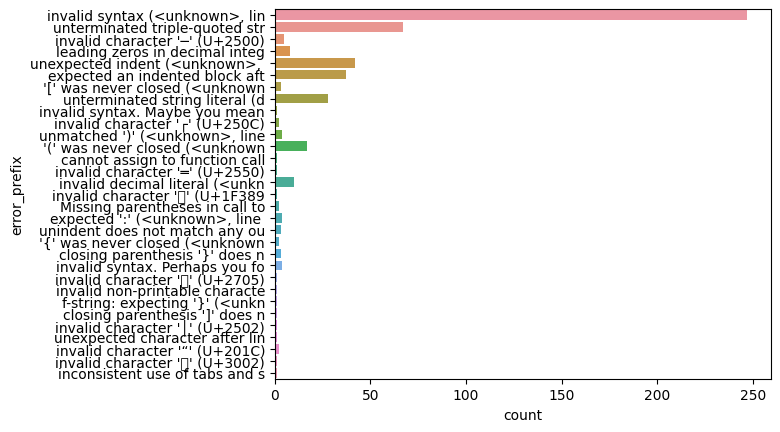

In [59]:
sns.countplot(
    df_remaining_errors,
    y="error_prefix"
)

<Axes: xlabel='count', ylabel='error_category'>

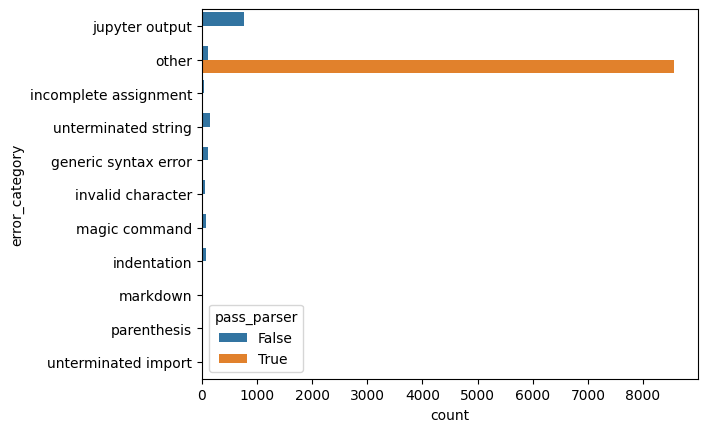

In [79]:
# normalize the error_prefix
def get_error_category(error: str, error_line_content: str) -> str:
    """Extract the error category from the error message.
    """
    if "parenthes" in error or "never closed" in error:
        return "parenthesis"
    elif "invalid character" in error:
        return "invalid character"
    elif "indent" in error:
        return "indentation"
    elif "unterminated triple-quoted str" in error or "unterminated string" in error:
        return "unterminated string"
    elif "invalid syntax" in error:
        if error_line_content.endswith("import"):
            return "unterminated import"
        elif error_line_content.strip().endswith("="):
            return "incomplete assignment"
        elif error_line_content.strip().startswith("%"):
            return "magic command"
        elif error_line_content.strip() == "```":
            return "markdown"
        elif "<jupyter_output>" in error_line_content:
            return "jupyter output"
        return "generic syntax error"

    return "other"

df_merged["error_category"] = df_merged.apply(
    lambda x: get_error_category(x["syntax_error"], x["error_line_content"]),
    axis=1
)
sns.countplot(
    df_merged,
    y="error_category",
    hue="pass_parser"
)

### Execution Exception: Why?

In [31]:

"""
[TRACE] Validating /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/78.fuzz ...
[VERBOSE] /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/78.fuzz is safe
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/79.fuzz:/79.fuzz qiskit-driver 79.fuzz', returncode=0, stdout='', stderr='')
[TRACE] Validating /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/79.fuzz ...
[VERBOSE] /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/79.fuzz is safe
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/80.fuzz:/80.fuzz qiskit-driver 80.fuzz', returncode=1, stdout='', stderr='Traceback (most recent call last):\n  File "//80.fuzz", line 6, in <module>\n    _create_qobj = _create_qobj\nNameError: name \'_create_qobj\' is not defined\n')
"""

# extract all the program numbers <number>.fuzz and the string after
sepator = "Validating /home"

program_chunks = log_validation.split(sepator)
# extract for each program its name and the 20 characters after the second occurence of its name
all_records = []
for program_chunk in tqdm(program_chunks):
    if len(program_chunk) == 0 or ".fuzz" not in program_chunk:
        continue
    program_number = int(re.findall(r".*(\d+).fuzz.*", program_chunk)[0])
    program_name = f"{program_number}.fuzz"
    i_first_occ = program_chunk.find(program_name) + len(program_name)
    i_second_occ = program_chunk.find(program_name, i_first_occ) + len(program_name)
    text_after_second_occurrence = program_chunk[i_second_occ:]
    main_message = text_after_second_occurrence.split("\n")[0].strip()

    # check the result
    result = "unknown"
    if "potential error" in main_message:
        result = "potential error"
    elif "is safe" in main_message:
        result = "safe"
    elif "failed validation with error message" in main_message:
        result = "garbage code"

    if result == "unknown":
        print(program_chunk)

    all_records.append({
        "program": program_name,
        "number": program_number,
        "main_message": main_message,
        "result": result
    })

df = pd.DataFrame.from_records(all_records)
print(df["result"].value_counts())
sns.countplot(
    y="result",
    data=df
)


  8%|▊         | 842/10021 [00:00<00:01, 8292.99it/s]

/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/0.fuzz ...
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/1.fuzz:/1.fuzz qiskit-driver 1.fuzz', returncode=1, stdout='', stderr='Traceback (most recent call last):\n  File "//1.fuzz", line 14, in <module>\n    convert_qasm(\'input_file.qasm\', \'output_file.qasm\')\n  File "//1.fuzz", line 9, in convert_qasm\n    circuit = QuantumCircuit.from_qasm_file(input_file)\n  File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py", line 2517, in from_qasm_file\n    return _circuit_from_qasm(qasm)\n  File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py", line 4964, in _circuit_from_qasm\n    ast = qasm.parse()\n  File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/qasm/qasm.py", line 48, in parse\n    with open(self._filename) as 

 23%|██▎       | 2265/10021 [00:00<00:01, 4552.70it/s]

/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/1573.fuzz ...
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/1574.fuzz:/1574.fuzz qiskit-driver 1574.fuzz', returncode=1, stdout='', stderr='Traceback (most recent call last):\n  File "//1574.fuzz", line 6, in <module>\n    r3 = QuantumRegister(3, "r3")\nNameError: name \'QuantumRegister\' is not defined\n')
[TRACE] 
/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/1576.fuzz ...
[TRACE] 
/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/1577.fuzz ...
[TRACE] 
/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/1578.fuzz ...
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/1579.fuzz:/1579.fuzz qiskit-driver 1579.fuzz', returncode=1, stdout='', stderr='Traceback (most recent call last):\n  File "//1579.fuz

 33%|███▎      | 3276/10021 [00:00<00:01, 4472.75it/s]

/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/2419.fuzz ...
[TRACE] 
/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/2420.fuzz ...
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/2421.fuzz:/2421.fuzz qiskit-driver 2421.fuzz', returncode=1, stdout='', stderr='Traceback (most recent call last):\n  File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py", line 5137, in _bit_argument_conversion\n    return [bit_sequence[specifier]]\nIndexError: list index out of range\n\nThe above exception was the direct cause of the following exception:\n\nTraceback (most recent call last):\n  File "//2421.fuzz", line 9, in <module>\n    qunf1.cx(0, 4)\n  File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py", line 3861, in cx\n    return self.append(\n  File "/opt/conda/envs/fuzz-everything/l

 42%|████▏     | 4234/10021 [00:00<00:01, 4132.81it/s]

/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/3574.fuzz ...
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/3575.fuzz:/3575.fuzz qiskit-driver 3575.fuzz', returncode=0, stdout='OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\ncreg c[2];\nh q[0];\nx q[1];\ncx q[0],q[1];\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\n\n', stderr='')
[TRACE] 
/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/3581.fuzz ...
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/3582.fuzz:/3582.fuzz qiskit-driver 3582.fuzz', returncode=1, stdout='', stderr='Traceback (most recent call last):\n  File "/opt/conda/envs/fuzz-everything/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py", line 5137, in _bit_argument_conversion\n    return [bit_sequence[specifier]]\nIndexError: list index out of ran

 51%|█████▏    | 5151/10021 [00:01<00:01, 4219.41it/s]

/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/4506.fuzz ...
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/4507.fuzz:/4507.fuzz qiskit-driver 4507.fuzz', returncode=0, stdout='        ┌───┐ ░ ┌─┐      \n   q_0: ┤ H ├─░─┤M├──────\n        ├───┤ ░ └╥┘┌─┐   \n   q_1: ┤ H ├─░──╫─┤M├───\n        └───┘ ░  ║ └╥┘┌─┐\n   q_2: ──────░──╫──╫─┤M├\n              ░  ║  ║ └╥┘\nmeas: 3/═════════╩══╩══╩═\n                 0  1  2 \nImporting test8.qasm\n', stderr='')
[TRACE] 
/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/4510.fuzz ...
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/4511.fuzz:/4511.fuzz qiskit-driver 4511.fuzz', returncode=0, stdout='        ┌───┐ ░ ┌─┐      \n   q_0: ┤ H ├─░─┤M├──────\n        ├───┤ ░ └╥┘┌─┐   \n   q_1: ┤ H ├─░──╫─┤M├───\n        └───┘ ░  ║ └╥┘┌─┐\n   q_

 60%|██████    | 6051/10021 [00:01<00:00, 4048.66it/s]

/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/5362.fuzz ...
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/5363.fuzz:/5363.fuzz qiskit-driver 5363.fuzz', returncode=0, stdout='', stderr='')
[TRACE] 
/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/5364.fuzz ...
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/5365.fuzz:/5365.fuzz qiskit-driver 5365.fuzz', returncode=0, stdout='', stderr='')
[TRACE] 
/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/5366.fuzz ...
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/5367.fuzz:/5367.fuzz qiskit-driver 5367.fuzz', returncode=1, stdout='', stderr='Traceback (most recent call last):\n  File "//5367.fuzz", line 30, in <module>\n    f

 70%|██████▉   | 6977/10021 [00:01<00:00, 4072.28it/s]

/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/6352.fuzz ...
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/6353.fuzz:/6353.fuzz qiskit-driver 6353.fuzz', returncode=1, stdout='', stderr='Traceback (most recent call last):\n  File "//6353.fuzz", line 9, in <module>\n    with open("circuits/my_circuit.qasm", "w") as qasm_file:\nFileNotFoundError: [Errno 2] No such file or directory: \'circuits/my_circuit.qasm\'\n')
[TRACE] 
/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/6361.fuzz ...
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/6362.fuzz:/6362.fuzz qiskit-driver 6362.fuzz', returncode=0, stdout='', stderr='')
[TRACE] 
/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/6363.fuzz ...
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/s

 78%|███████▊  | 7844/10021 [00:01<00:00, 3778.48it/s]

/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/7157.fuzz ...
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/7158.fuzz:/7158.fuzz qiskit-driver 7158.fuzz', returncode=0, stdout='', stderr='')
[TRACE] 
/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/7166.fuzz ...
[TRACE] 
/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/7167.fuzz ...
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/7168.fuzz:/7168.fuzz qiskit-driver 7168.fuzz', returncode=0, stdout='', stderr='')
[TRACE] 
/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/7171.fuzz ...
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/7172.fuzz:/7172.fuzz qiskit-driver 7172.fuzz', returncode=0, stdout='', stderr

 91%|█████████▏| 9168/10021 [00:02<00:00, 5310.34it/s]

/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/7976.fuzz ...
[TRACE] 
/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/7977.fuzz ...
[TRACE] 
/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/7978.fuzz ...
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/7979.fuzz:/7979.fuzz qiskit-driver 7979.fuzz', returncode=0, stdout='', stderr='')
[TRACE] 
/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/8000.fuzz ...
[TRACE] 
/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/8001.fuzz ...
[TRACE] 
/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/8002.fuzz ...
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/8003.fuzz:/8003.fuzz qiskit-driver 8003.fuzz', returncode=0, stdout='', stderr='')
[TRACE] 
/steven/fastd/fuzzall/FuzzAll/expe

 98%|█████████▊| 9786/10021 [00:02<00:00, 4401.22it/s]


/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/9578.fuzz ...
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/9579.fuzz:/9579.fuzz qiskit-driver 9579.fuzz', returncode=0, stdout='Importing save_g_g55.qasm\n', stderr='')
[TRACE] 
/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/9582.fuzz ...
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/9583.fuzz:/9583.fuzz qiskit-driver 9583.fuzz', returncode=0, stdout='Importing save_g_g42.qasm\n', stderr='')
[TRACE] 
/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/9726.fuzz ...
[VERBOSE] Execution result: CompletedProcess(args='docker run --rm -v /home/steven/fastd/fuzzall/FuzzAll/experiment/qiskit/run_metamorphic/9727.fuzz:/9727.fuzz qiskit-driver 9727.fuzz', returncode=1, stdout='', stderr='Traceback (most recent call las

KeyboardInterrupt: 

In [20]:
df.head()

,program,number,main_message,is_safe
0,0.fuzz,0,...,False
1,1.fuzz,1,""", line 9, in convert_qasm",False
2,2.fuzz,2,""", line 12, in <module>",False
3,3.fuzz,3,is safe,True
4,4.fuzz,4,is safe,True
